In [1]:
import sys

path_src = '../src'
sys.path.append(path_src)
import importlib
import SpatialAnalysis as SpAn
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

path_src = '../../tysserand2/'


Script loaded!


<Axes: xlabel='0', ylabel='1'>

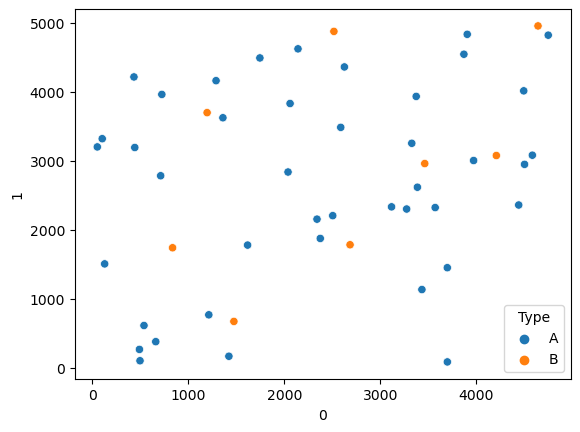

In [2]:
example_01 = '../data/simulation_coordiantes/example_01.csv'
nodes_01 = pd.read_csv(example_01)
sns.scatterplot(x = nodes_01.iloc[:,0], y = nodes_01.iloc[:,1], hue = nodes_01.iloc[:,2])


# Delunay Tri

In [3]:
points = nodes_01.iloc[:,[0,1]]
types = nodes_01.iloc[:,2].values

Script loaded!


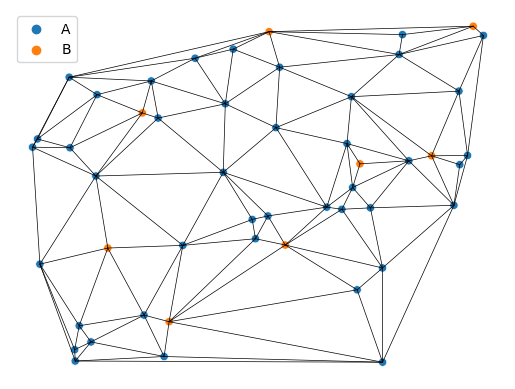

In [4]:
import importlib
importlib.reload(SpAn)

delaunay_edges = SpAn.delaunay_edges(points)

SpAn.plot_network(points, delaunay_edges, types = types, linewidth = .5)

# Min Spanning Tree

Script loaded!


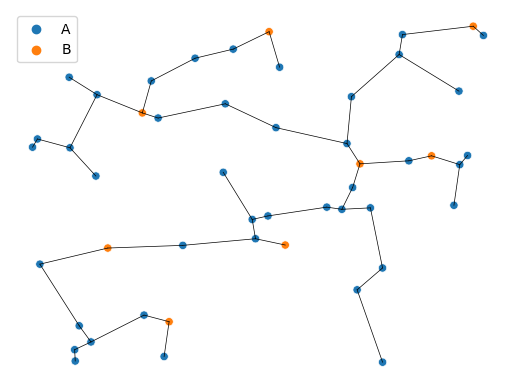

In [5]:
importlib.reload(SpAn)
mst_edges = SpAn.mst_edges(points)
SpAn.plot_network(points, mst_edges, types = types, linewidth = .5)


# Gabriel Graph

Script loaded!


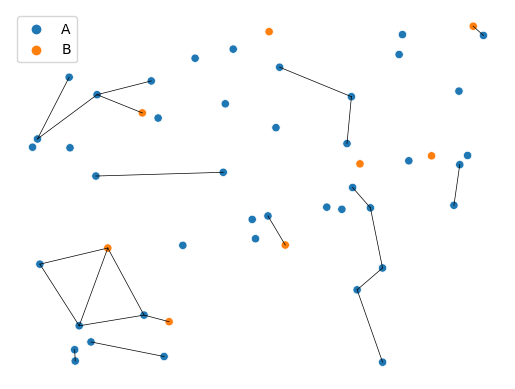

In [6]:
importlib.reload(SpAn)
gabriel_edges = SpAn.gabriel_edges(points)
SpAn.plot_network(points, gabriel_edges, types = types, linewidth = .5)

# Relative Neighborhood Graph 

Script loaded!


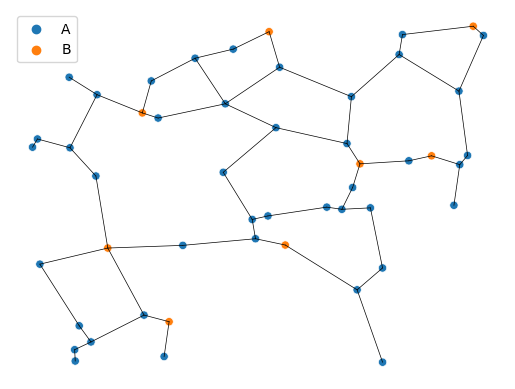

In [7]:
importlib.reload(SpAn)
rng_edges = SpAn.rng_edges(points)
SpAn.plot_network(points, rng_edges, types = types, linewidth = .5)

# eps_nets_edges

Script loaded!


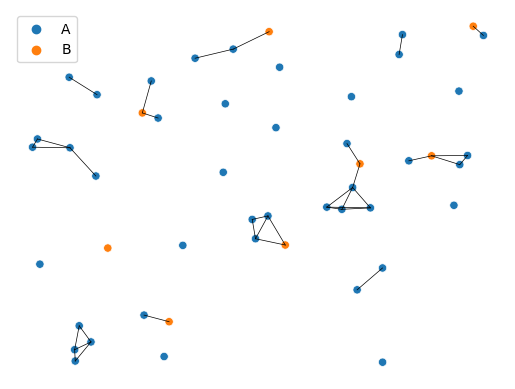

In [8]:
importlib.reload(SpAn)
EpsNet_edges = SpAn.EpsNet_edges(points, epsilon = 500)
SpAn.plot_network(points, EpsNet_edges, types = types, linewidth = .5)

# KNN

Script loaded!


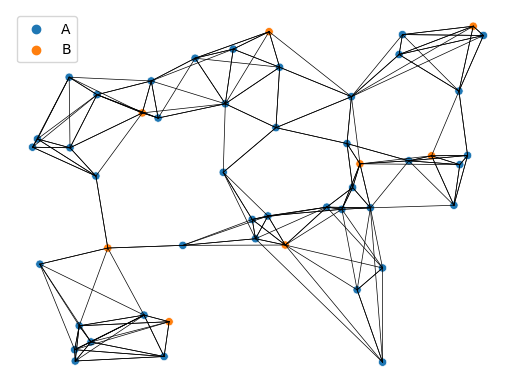

In [9]:
importlib.reload(SpAn)
knn5_edges = SpAn.knn_edges(points, k = 5)
SpAn.plot_network(points, knn5_edges, types = types, linewidth = .5)

Script loaded!


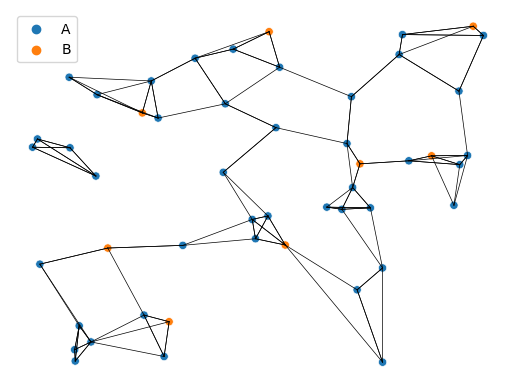

In [10]:
importlib.reload(SpAn)
knn_edges = SpAn.knn_edges(points, k = 3)
SpAn.plot_network(points, knn_edges, types = types, linewidth = .5)

# Optimal KNN

Script loaded!


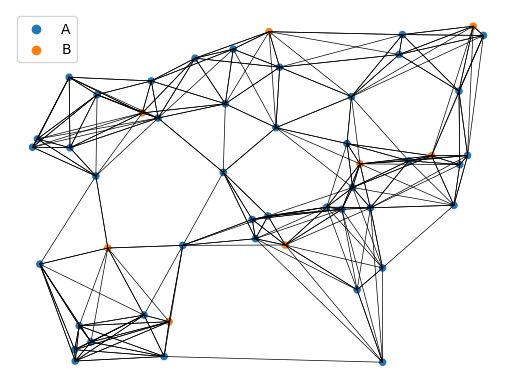

In [11]:
importlib.reload(SpAn)
optimal_knn_edges = SpAn.optimal_knn_edges(points, max_k=10)
SpAn.plot_network(points, optimal_knn_edges, types = types, linewidth = .5)

# Maximal Radious

Script loaded!


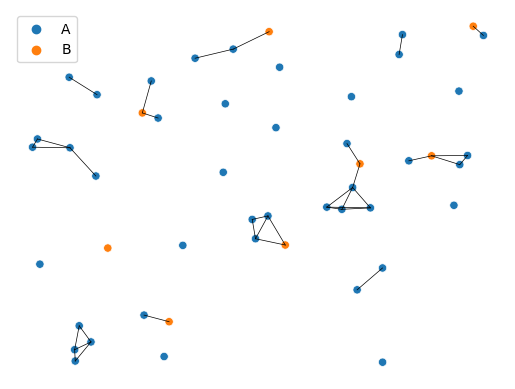

In [12]:
importlib.reload(SpAn)
radius_edges = SpAn.radius_edges(points, 500)
SpAn.plot_network(points, radius_edges, types = types, linewidth = .5)

# RIPS Complex

Script loaded!


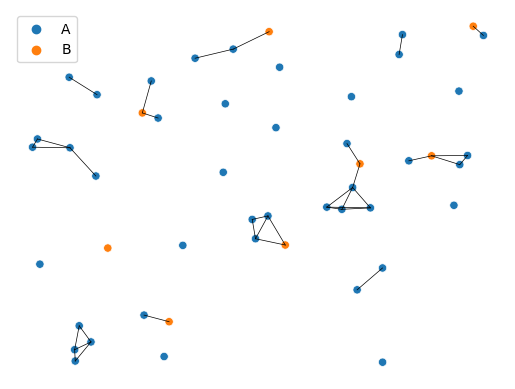

In [13]:
importlib.reload(SpAn)
rips_complex_edges = SpAn.rips_complex_edges(points, 500)
SpAn.plot_network(points, rips_complex_edges, types = types, linewidth = .5)

# Plot

Script loaded!


/home/abdelmounim.essabbar/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/abdelmounim.essabbar/Projects/Spatial-Omics-Networks-Benchmark-/pipelines/../src/SpatialAnalysis.py:506: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


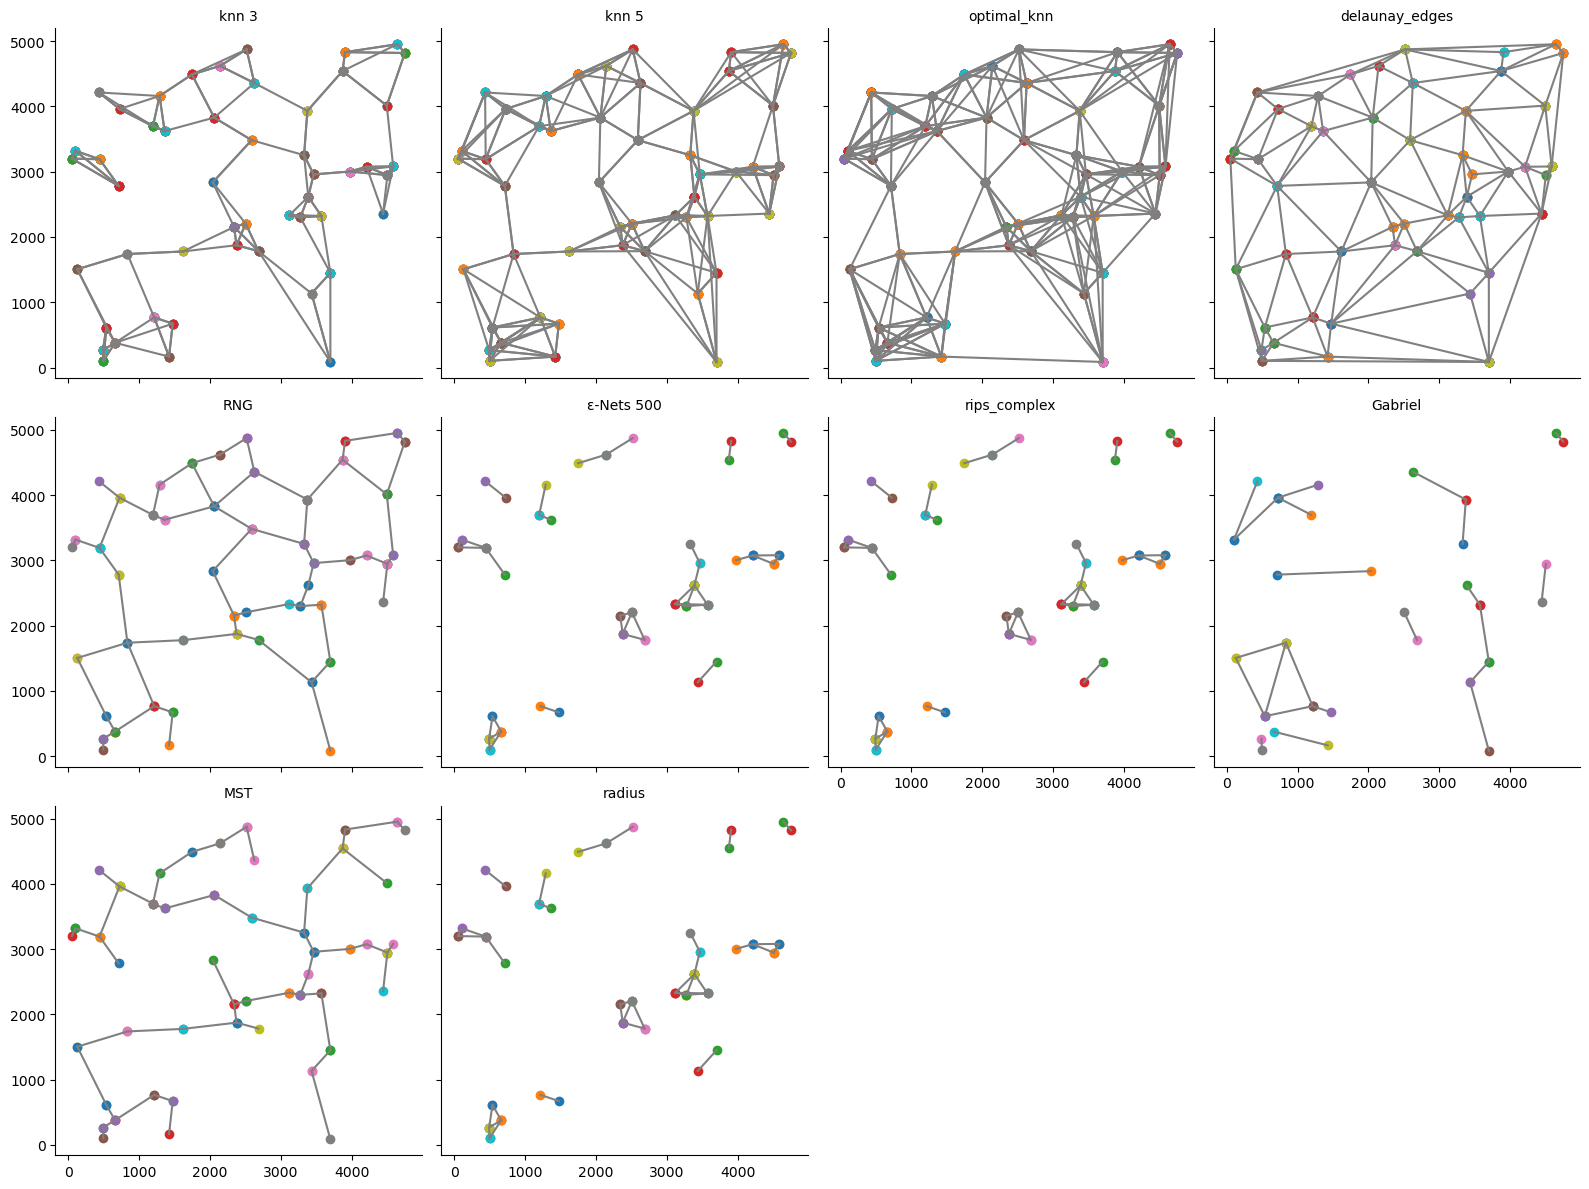

In [16]:
importlib.reload(SpAn)

points = nodes_01.iloc[:,[0,1]]
types = nodes_01.iloc[:,2].values

edges_dict = {
    'knn 3': knn_edges,
    'knn 5': knn5_edges,
    'optimal_knn': optimal_knn_edges,
    'delaunay_edges': delaunay_edges,
    'RNG': rng_edges,
    'ε-Nets 500': EpsNet_edges,
    'rips_complex': rips_complex_edges,
    'Gabriel': gabriel_edges,
    'MST': mst_edges,
    'radius': radius_edges,
    
}


edges_data = []
for method, edges in edges_dict.items():
    for edge in edges:
        row = {'method': method, 'x1': points.iloc[edge[0], 0], 'y1': points.iloc[edge[0], 1], 'x2': points.iloc[edge[1], 0], 'y2': points.iloc[edge[1], 1], 'source':edge[0], 'target':edge[1]}
        edges_data.append(row)
edges_df = pd.DataFrame(edges_data)

SpAn.plot_facetgrid_networks(edges_df, col_wrap = 4)



# Common connections

In [121]:
import random

n_itter = 1
networkSize_range = [100, 100]

max_x, max_y = 5000, 5000
num_points = 50
min_distances = range(1,5001,5)
annotations = {'A':1,'B':0}

count_edges = []
edges_all = []

for min_distance in min_distances:
    print(f'min_distance: {min_distance}')
    for itr in range(n_itter):
        try:
            points, annotation_list = SpAn.generate_points(max_x, max_y, num_points, min_distance = min_distance, equidistant=False, annotation = annotations)
            
            points = pd.DataFrame(points)
            edges_dict = {
                'knn 3': SpAn.knn_edges(points, 3) ,
                'knn 5': SpAn.knn_edges(points, 5) ,
                'optimal_knn': SpAn.optimal_knn_edges(points, max_k=10) ,
                'delaunay_edges': SpAn.delaunay_edges(points) ,
                'RNG': SpAn.rng_edges(points) ,
                'ε-Nets 700': SpAn.EpsNet_edges(points, epsilon = 700) ,
                'rips_complex 700': SpAn.rips_complex_edges(points, 700) ,
                'Gabriel': SpAn.gabriel_edges(points) ,
                'MST': SpAn.mst_edges(points) ,
                'radius': SpAn.radius_edges(points, 700) ,
            }


            edges_data = []
            for method, edges in edges_dict.items():
                for edge in edges:
                    row = {'method': method,'min_dist': min_distance, 'x1': points.iloc[edge[0], 0], 'y1': points.iloc[edge[0], 1], 'x2': points.iloc[edge[1], 0], 'y2': points.iloc[edge[1], 1], 'source':edge[0], 'target':edge[1]}
                    edges_data.append(row)
                    edges_all.append(row)
            edges_df = pd.DataFrame(edges_data)
            count_edges.append(edges_df[['method','min_dist']].value_counts())
        except:
            pass


CountEdges = pd.concat(count_edges,axis=1)
CountEdges

min_distance: 1
min_distance: 6
min_distance: 11
min_distance: 16
min_distance: 21
min_distance: 26
min_distance: 31
min_distance: 36
min_distance: 41
min_distance: 46
min_distance: 51
min_distance: 56
min_distance: 61
min_distance: 66
min_distance: 71
min_distance: 76
min_distance: 81
min_distance: 86
min_distance: 91
min_distance: 96
min_distance: 101
min_distance: 106
min_distance: 111
min_distance: 116
min_distance: 121
min_distance: 126
min_distance: 131
min_distance: 136
min_distance: 141
min_distance: 146
min_distance: 151
min_distance: 156
min_distance: 161
min_distance: 166
min_distance: 171
min_distance: 176
min_distance: 181
min_distance: 186
min_distance: 191
min_distance: 196
min_distance: 201
min_distance: 206
min_distance: 211
min_distance: 216
min_distance: 221
min_distance: 226
min_distance: 231
min_distance: 236
min_distance: 241
min_distance: 246
min_distance: 251
min_distance: 256
min_distance: 261
min_distance: 266
min_distance: 271
min_distance: 276
min_distance: 

,,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
method,min_dist,,,,,,,,,,,,,,,,,,,,,
optimal_knn,1,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
knn 5,1,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
knn 3,1,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delaunay_edges,1,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rips_complex 700,1,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MST,611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0
rips_complex 700,611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0
radius,611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0


/tmp/ipykernel_826145/4273568824.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  M = CountEdges.reset_index().melt(id_vars=['method','min_dist']).pivot_table(index = 'method', columns='min_dist', values='value', aggfunc=sum)


<Axes: xlabel='min_dist', ylabel='method'>

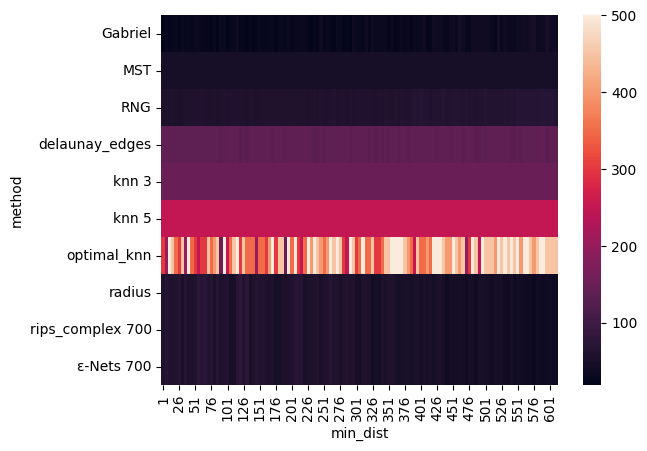

In [122]:
M = CountEdges.reset_index().melt(id_vars=['method','min_dist']).pivot_table(index = 'method', columns='min_dist', values='value', aggfunc=sum)
sns.heatmap(M)

Text(45.63440340909093, 0.5, 'Number of connections per node')

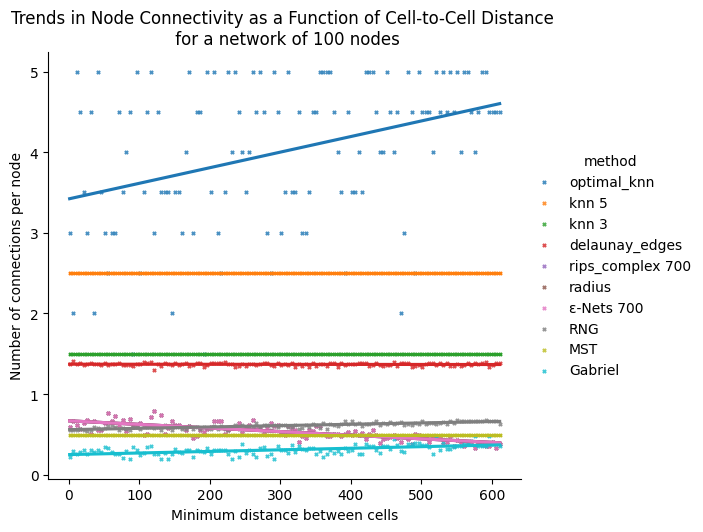

In [124]:
DistEdges = CountEdges.reset_index().melt(id_vars=['method','min_dist'])
DistEdges['value'] = DistEdges['value'] / 100
sns.lmplot(x='min_dist', y='value', hue='method', data=DistEdges, aspect=1.1, markers='x', ci=None, scatter_kws={"s": 5})
plt.title('Trends in Node Connectivity as a Function of Cell-to-Cell Distance \n for a network of 100 nodes')
plt.xlabel('Minimum distance between cells')
plt.ylabel('Number of connections per node')

In [126]:
CountOfEdges = CountEdges.T
CountOfEdges = CountOfEdges.drop('optimal_knn',axis=1) /100
# sns.histplot(CountOfEdges / 100,  kde=True)
# plt.show()

/tmp/ipykernel_826145/4053302099.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  CountOfEdges = CountOfEdges.drop('optimal_knn',axis=1) /100


In [127]:
allEdges = pd.DataFrame(edges_all)
allEdges

,method,min_dist,x1,y1,x2,y2,source,target
0,knn 3,1,837.779423,1399.482224,935.077739,1444.209246,0,11
1,knn 3,1,837.779423,1399.482224,1050.331039,1500.623333,0,46
2,knn 3,1,837.779423,1399.482224,298.183265,1165.106983,0,44
3,knn 3,1,309.143056,1954.358792,480.729558,2295.245584,1,48
4,knn 3,1,309.143056,1954.358792,772.351108,2311.943270,1,43
...,...,...,...,...,...,...,...,...
152293,radius,611,1967.649818,873.306992,1401.014568,583.958587,29,48
152294,radius,611,3637.252785,1729.499058,3002.597264,1857.146893,3,32
152295,radius,611,3637.252785,1729.499058,4271.009316,1634.949712,3,38
152296,radius,611,727.206503,3606.948282,97.035053,3604.986764,11,30


In [147]:
def get_intersection(edges1, edges2, ratio = True):
    E1 = edges1[['source','target','method','min_dist']].drop_duplicates()
    E2 = edges2[['source','target','method','min_dist']].drop_duplicates()
    intersection_df = pd.merge(E1, E2, on=['source','target','min_dist'])
    # Drop duplicates in case there are any
    intersection_df = intersection_df.drop_duplicates()
    if ratio:
        return intersection_df.shape[0]
    return intersection_df.shape[0]

def get_union(edges1, edges2, ratio = True):
    E1 = edges1[['source','target','method','min_dist']].drop_duplicates()
    E2 = edges2[['source','target','method','min_dist']].drop_duplicates()
    intersection_df = pd.merge(E1, E2, on=['source','target','min_dist'], how = 'outer')
    # Drop duplicates in case there are any
    intersection_df = intersection_df.drop_duplicates()
    if ratio:
        return intersection_df.shape[0]
    return intersection_df.shape[0]

In [148]:
import numpy as np

# Group by 'method' and 'min_dist' and find common edges

# Get unique methods
unique_methods = allEdges['method'].unique()

# Initialize matrix
num_methods = len(unique_methods)
common_edges_matrix = np.zeros((num_methods, num_methods), dtype=float)

# Count common edges
for i in range(num_methods):
    for j in range(num_methods):
        method1 = unique_methods[i]
        method2 = unique_methods[j]
        edges1 = allEdges[allEdges['method'] == method1]
        edges2 = allEdges[allEdges['method'] == method2]
        P = get_intersection(edges1, edges2)
        U = get_union(edges1, edges2)
        print(P , U, P / U)
        common_edges_matrix[i, j] = P / U

common_edges_common_edges = pd.DataFrame(common_edges_matrix, index=unique_methods, columns=unique_methods)

display(common_edges_common_edges)

18450 18450 1.0
18450 30750 0.6
18450 49350 0.3738601823708207
8719 26558 0.3283003238195647
6463 19481 0.3317591499409681
5916 19067 0.31027429590391775
5916 19067 0.31027429590391775
2527 19724 0.12811802879740417
5664 18813 0.30106841014192315
5916 19067 0.31027429590391775
18450 30750 0.6
30750 30750 1.0
30350 49750 0.6100502512562814
12557 35020 0.3585665334094803
7303 30941 0.23602986328819367
6480 30803 0.21036911989091972
6480 30803 0.21036911989091972
3303 31248 0.10570276497695852
5991 30786 0.19460144221399336
6480 30803 0.21036911989091972
18450 49350 0.3738601823708207
30350 49750 0.6100502512562814
49350 49350 1.0
14618 51559 0.28351985104443456
7411 49433 0.14992009386442257
6498 49385 0.13157841449832947
6498 49385 0.13157841449832947
3612 49539 0.07291225095379399
6006 49371 0.12165036154827732
6498 49385 0.13157841449832947
8719 26558 0.3283003238195647
12557 35020 0.3585665334094803
14618 51559 0.28351985104443456
16827 16827 1.0
7494 16827 0.4453556783740417
6229 17

,knn 3,knn 5,optimal_knn,delaunay_edges,RNG,ε-Nets 700,rips_complex 700,Gabriel,MST,radius
knn 3,1.000000,0.600000,0.373860,0.328300,0.331759,0.310274,0.310274,0.128118,0.301068,0.310274
knn 5,0.600000,1.000000,0.610050,0.358567,0.236030,0.210369,0.210369,0.105703,0.194601,0.210369
optimal_knn,0.373860,0.610050,1.000000,0.283520,0.149920,0.131578,0.131578,0.072912,0.121650,0.131578
delaunay_edges,0.328300,0.358567,0.283520,1.000000,0.445356,0.363610,0.363610,0.225887,0.358174,0.363610
RNG,0.331759,0.236030,0.149920,0.445356,1.000000,0.548747,0.548747,0.274687,0.804243,0.548747
ε-Nets 700,0.310274,0.210369,0.131578,0.363610,0.548747,1.000000,1.000000,0.211489,0.621691,1.000000
rips_complex 700,0.310274,0.210369,0.131578,0.363610,0.548747,1.000000,1.000000,0.211489,0.621691,1.000000
Gabriel,0.128118,0.105703,0.072912,0.225887,0.274687,0.211489,0.211489,1.000000,0.243107,0.211489
MST,0.301068,0.194601,0.121650,0.358174,0.804243,0.621691,0.621691,0.243107,1.000000,0.621691
radius,0.310274,0.210369,0.131578,0.363610,0.548747,1.000000,1.000000,0.211489,0.621691,1.000000


Text(0.5, 0.98, 'Common connections between different algorithms')

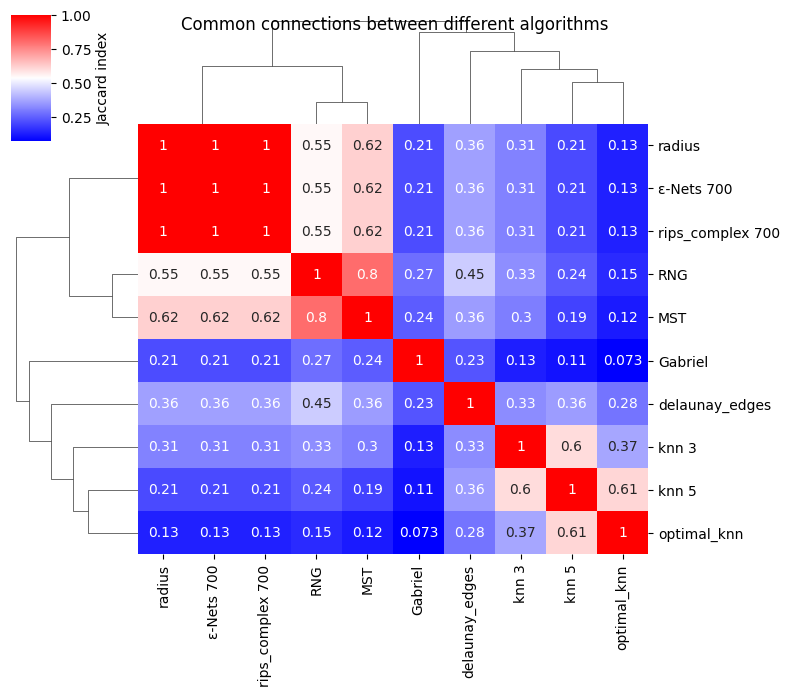

In [169]:
# sns.heatmap(common_edges_common_edges, cmap='bwr', annot=True, cbar_kws={'label': 'Similarity (0-1)'})
# plt.show()
g = sns.clustermap(common_edges_common_edges, cmap='bwr', figsize=[8,7], annot=True, cbar_kws={'label': 'Jaccard index'})
g.fig.suptitle('Common connections between different algorithms') 
